# II - Redes Densas
Este ejemplo demuestra la construcción, entrenamiento y evaluación de una red neuronal densa utilizando TensorFlow y Keras para el problema de clasificación de imágenes del conjunto de datos MNIST. La arquitectura del modelo incluye capas densas con activaciones ReLU y Dropout para la regularización, y una capa
de salida con activación Softmax para producir probabilidades de clasificación. El modelo se entrena con el optimizador Adam y la función de pérdida de entropía cruzada categórica, monitoreando la precisión tanto en el conjunto de entrenamiento como en el de validación.

## 1. Importar librerias

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Parametros de entrenamiento

In [3]:
lr = 1.0
epochs = 20
batch_size = 128
np.random.seed(14)

## 2. Cargar y visualizar el dataset
Se carga el conjunto de datos MNIST, que contiene imágenes de dígitos manuscritos (0-9). Luego, los datos se normalizan y se convierten a categorías:

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.max(np.unique(y_train)) + 1
print("Cantidad de clases: %d" % (n_classes))

11490434/11490434 [==============================] - 0s 0us/step
Cantidad de clases: 10


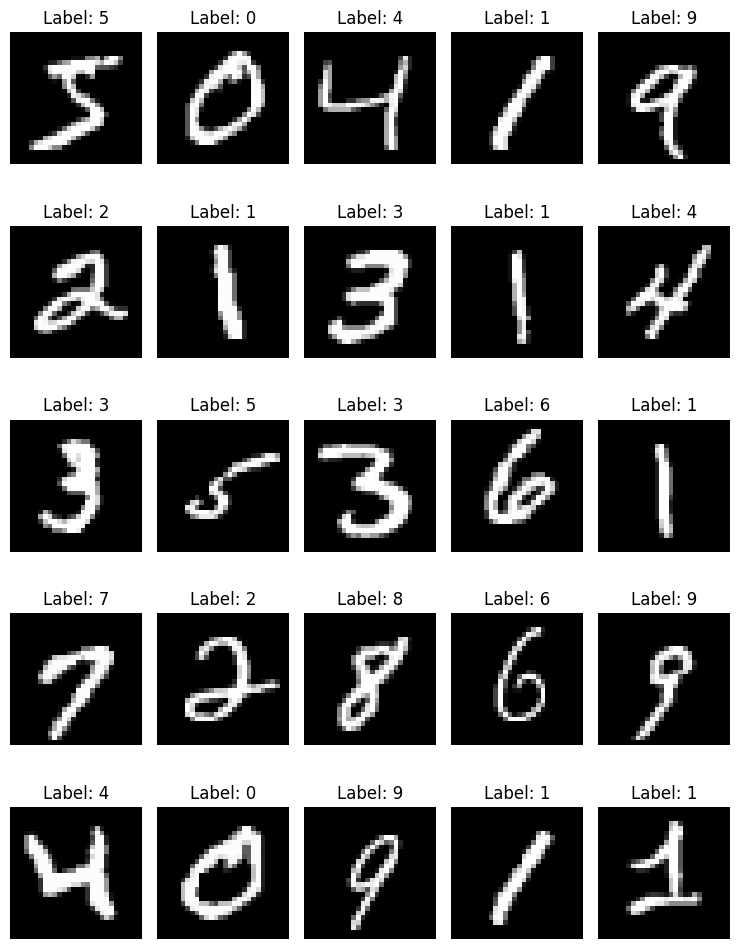

In [5]:
num = 25
images = x_train[:num]
labels = y_train[:num]
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

### Preparacion de los datos

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

In [8]:
x_train.shape = (x_train.shape[0], np.prod(x_train.shape[1:]))
x_test.shape = (x_test.shape[0], np.prod(x_test.shape[1:]))

## 3. Contrucción del modelo
Se define un modelo secuencial con capas densas (Dense). Se utiliza la función de activación ReLU en las capas ocultas y Softmax en la capa de salida:

In [9]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=x_train.shape[1:])
dense_1 = Dense(512, activation='relu') (input_layer) # números de neuronas potencias de 2
# Se aplica dropout con una tasa del 20%
# dropout_1 = Dropout(0.20) (dense_1) # ctrl + /
dense_2 = Dense(512, activation='relu') (dense_1)
# dropout_2 = Dropout(0.20) (dense_2)
dense_3 = Dense(128, activation='relu') (dense_2)
# dropout_3 = Dropout(0.20) (dense_3)
output_layer = Dense(n_classes, activation='softmax') (dense_3)
#---------------------------------------------------------------------#
model = Model(input_layer, output_layer)

### Arquitectura de la red neuronal
La elección de la arquitectura de una red neuronal, incluyendo el número de capas y el número de neuronas en cada capa, es una parte crucial del diseño del modelo y puede influir significativamente en su rendimiento.
La arquitectura elegída del modelo en el ejemplo está basada en una combinación de principios teóricos y prácticas empíricas. Las capas densas con 500 y 100 neuronas permiten al modelo aprender características complejas y abstractas, mientras que la capa de salida con 10 neuronas corresponde a las clases (0-9) de salida. Experimentar con diferentes configuraciones y utilizar técnicas de regularización ayuda a encontrar un balance óptimo entre capacidad y generalización.

### Uso de la Función Dropout en la Construcción del Modelo
La función Dropout se utiliza en la construcción de redes neuronales densas como una técnica de regularización para prevenir el sobreajuste (overfitting). El sobreajuste ocurre cuando un modelo aprende demasiado bien los detalles y el ruido del conjunto de datos de entrenamiento, lo que resulta en un mal desempeño en datos no vistos.

### ¿Qué es Dropout?
Dropout es una técnica en la que, durante el entrenamiento de la red neuronal, se "desconectan" aleatoriamente un porcentaje de neuronas en cada capa durante cada iteración. Esto significa que las conexiones de estas neuronas no se consideran en el proceso de forward y backward propagation durante esa iteración específica. Las neuronas "desconectadas" cambian en cada iteración, lo que fuerza a la red a no depender excesivamente de ninguna neurona en particular.

### Beneficios de Dropout
* Prevención del Sobreajuste
* Mejora en la Robustez del Modelo
* Regularización Eficiente


## 4. *Compilación del Modelo*
Se compila el modelo especificando el optimizador, la función de pérdida y las métricas a monitorear:

In [10]:
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 731530 (2.79 MB)
Trainable params: 731530 (2.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Componentes del Resumen del Modelo**
* Layer (type):
 * Indica el nombre y el tipo de capa en la red neuronal.
 * Ejemplos: `InputLayer`, `Dense`.
* Output Shape:
 * Muestra la forma de la salida de cada capa.
 * `None` indica que el tamaño del lote (batch size) no está especificado y puede variar.
 * Los otros números indican la dimensión de los datos en esa capa.
* Param #:
 * Indica el número total de parámetros entrenables en esa capa.
 * Incluye los pesos y los sesgos (biases).

## 5. Entrenar el modelo
El modelo se entrena utilizando los datos de entrenamiento. Se especifica el número de épocas y el tamaño del lote:

In [11]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nTiempo de entrenamiento del modelo denso transcurrido: {:.5f} segundos'.format(end_time-start_time))

Epoch 1/20
469/469 [==============================] - 13s 25ms/step - loss: 0.2605 - acc: 0.9191 - mse: 0.0119 - val_loss: 0.1042 - val_acc: 0.9672 - val_mse: 0.0049
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0901 - acc: 0.9728 - mse: 0.0042 - val_loss: 0.0806 - val_acc: 0.9751 - val_mse: 0.0038
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0559 - acc: 0.9824 - mse: 0.0027 - val_loss: 0.0759 - val_acc: 0.9756 - val_mse: 0.0036
Epoch 4/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0371 - acc: 0.9880 - mse: 0.0018 - val_loss: 0.0623 - val_acc: 0.9805 - val_mse: 0.0030
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0243 - acc: 0.9925 - mse: 0.0012 - val_loss: 0.0711 - val_acc: 0.9801 - val_mse: 0.0031
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0168 - acc: 0.9948 - mse: 8.1735e-04 - val_loss: 0.0617 - val_acc: 0.9824 - val_mse: 0.0028


**Componentes Clave de la Salida del Entrenamiento**
* Epoch: Indica la época actual del entrenamiento. Una época es un ciclo completo a través del conjunto de datos de entrenamiento. Ejemplo: `Epoch 1/20` indica que es la primera de 20 épocas.
* `469/469 [========...]`: Muestra el progreso dentro de una época en términos de lotes (batches) procesados. 469/469 significa que se han completado 469 lotes en esa época.
* Time per Step: Muestra el tiempo promedio por paso. Ejemplo: `11s 24ms/step` significa que cada paso tomó en promedio 11 segundos y 24 milisegundos.
* Loss: La función de pérdida calculada en el conjunto de entrenamiento. Ejemplo: `loss: 0.2605` indica la pérdida en la primera época.
* Accuracy: Precisión en el conjunto de entrenamiento. Ejemplo: `acc: 0.9191` significa que la precisión del modelo en el conjunto de entrenamiento es del 91.91%.
* MSE: Error cuadrático medio en el conjunto de entrenamiento. Ejemplo: `mse: 0.0119`.
*Validation Loss (Pérdida de Validación): La función de pérdida calculada en el conjunto de validación. Ejemplo: `val_loss: 0.1042` indica la pérdida en el conjunto de validación durante la primera época.
* Validation Accuracy (Precisión de Validación): Precisión en el conjunto de validación. Ejemplo: `val_acc: 0.9672` significa que la precisión del modelo en el conjunto de validación es del 96.72%.
*Validation MSE: Error cuadrático medio en el conjunto de validación.
Ejemplo: `val_mse: 0.0049`.

## 6. Evaluar el proceso de entrenamiento
Se evalúa el desempeño del modelo utilizando los datos de prueba:

In [13]:
# Claves del diccionario que almacena los valores de las métricas
# registradas durante el entrenamiento de un modelo en Keras.
history.history.keys()

dict_keys(['loss', 'acc', 'mse', 'val_loss', 'val_acc', 'val_mse'])

### Visualización de Resultados
Se pueden graficar las métricas de precisión y pérdida para observar el desempeño del modelo durante el entrenamiento:

* **Evolución del Error Cuadrático Medio (MSE) durante el entrenamiento y la validación del modelo a lo largo de las épocas.**
El objetivo de este gráfico es evaluar el rendimiento del modelo durante el entrenamiento y la validación, monitoreando el error cuadrático medio (MSE) a lo largo de las épocas. Una disminución y estabilización del MSE en ambas curvas (entrenamiento y validación) indica que el modelo está aprendiendo correctamente y generalizando bien a datos no vistos. Este gráfico ayuda a detectar problemas de sobreajuste, que se manifiestan si la curva de validación empieza a aumentar mientras la de entrenamiento sigue disminuyendo, lo que indicaría que el modelo está memorizando los datos de entrenamiento sin aprender patrones generales útiles.

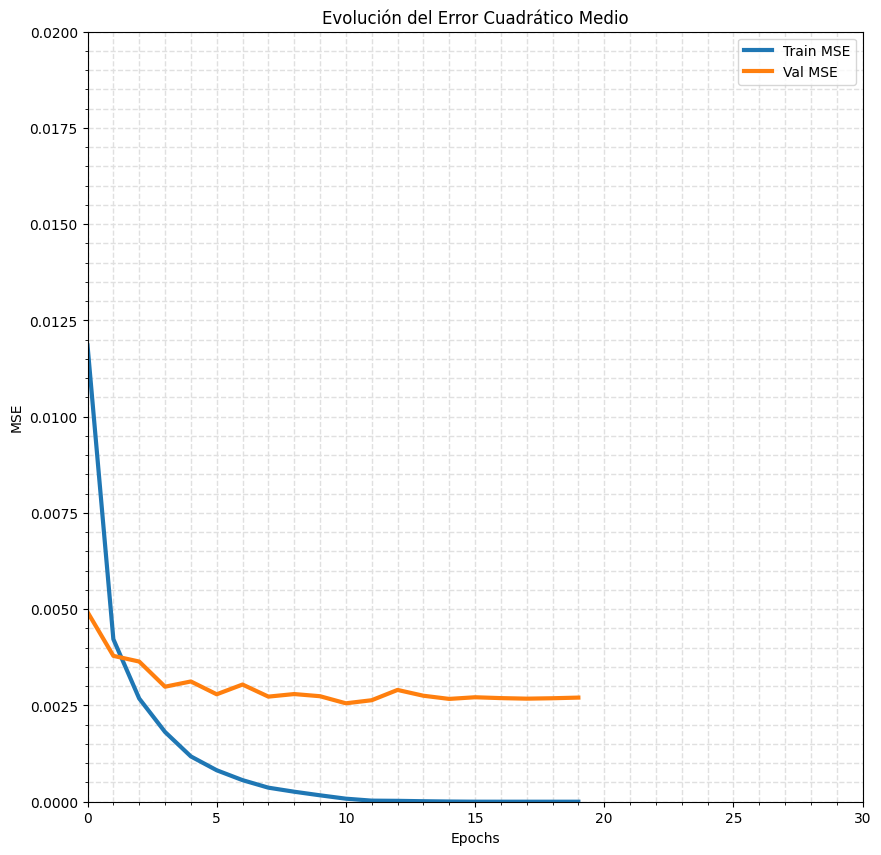

In [37]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['mse'], linewidth=3, label='Train MSE')
plt.plot(history.history['val_mse'], linewidth=3, label='Val MSE')
plt.grid(True, which='both', linestyle='--', linewidth=1, color='#E0E0E0')
plt.minorticks_on()
plt.title('Evolución del Error Cuadrático Medio')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, 30, 0, 0.02])
plt.legend(loc='upper right')
plt.show()

* **Evolución de la precisión (accuracy) durante el entrenamiento y la validación de un modelo a lo largo de las épocas.**
El objetivo de este gráfico es evaluar y comparar el rendimiento del modelo en términos de precisión (accuracy) tanto durante el entrenamiento como en la validación a lo largo de múltiples épocas. Al visualizar la evolución de la precisión en ambos conjuntos de datos, se puede verificar que el modelo está aprendiendo correctamente y generalizando bien a datos no vistos. Una estabilización de las curvas con una pequeña diferencia entre la precisión de entrenamiento y la de validación indica un buen equilibrio, sugiriendo que el modelo no está sobreajustado y es capaz de realizar predicciones precisas en datos nuevos.

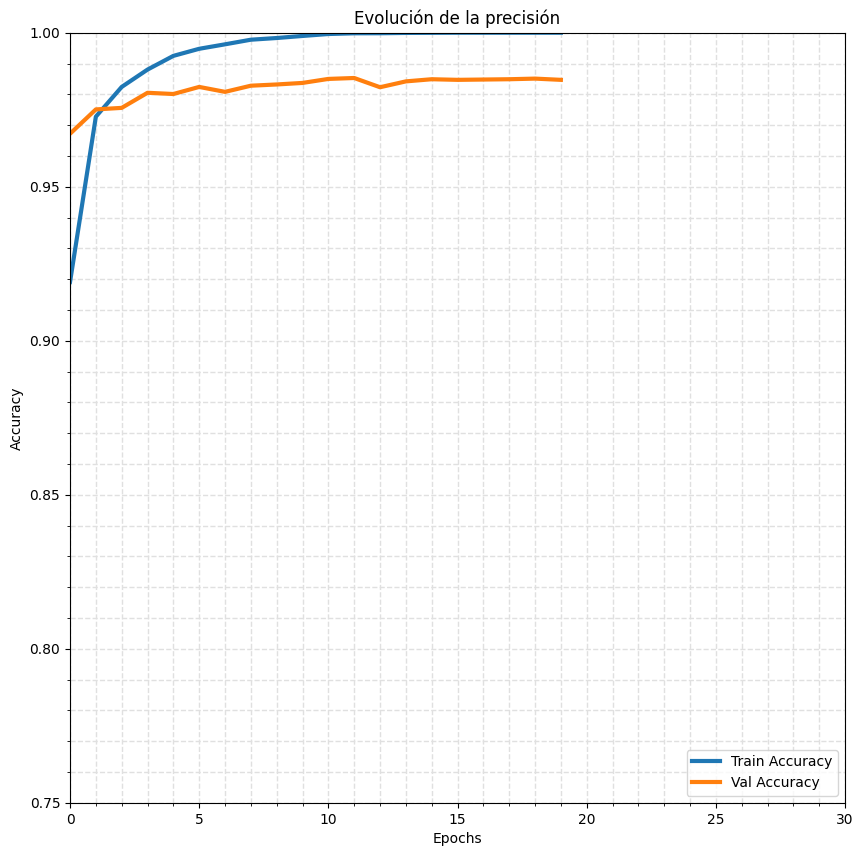

In [36]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.grid(True, which='both', linestyle='--', linewidth=1, color='#E0E0E0')
plt.minorticks_on()
plt.title('Evolución de la precisión')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 30, 0.75, 1])
plt.legend(loc='lower right')

* **Evolución de la pérdida (loss) durante el entrenamiento y la validación de un modelo a lo largo de las épocas**
Este gráfico sirve para evaluar y comparar la pérdida (loss) del modelo tanto durante el entrenamiento como en la validación a lo largo de múltiples épocas. Al visualizar la evolución de la pérdida en ambos conjuntos de datos, se puede verificar que el modelo está aprendiendo correctamente y mejorando su rendimiento en términos de minimizar el error. Una estabilización de las curvas de pérdida, con una pequeña diferencia entre la pérdida de entrenamiento y la de validación, sugiere que el modelo tiene un buen equilibrio entre ajuste y generalización, y que no está sobreajustado a los datos de entrenamiento.

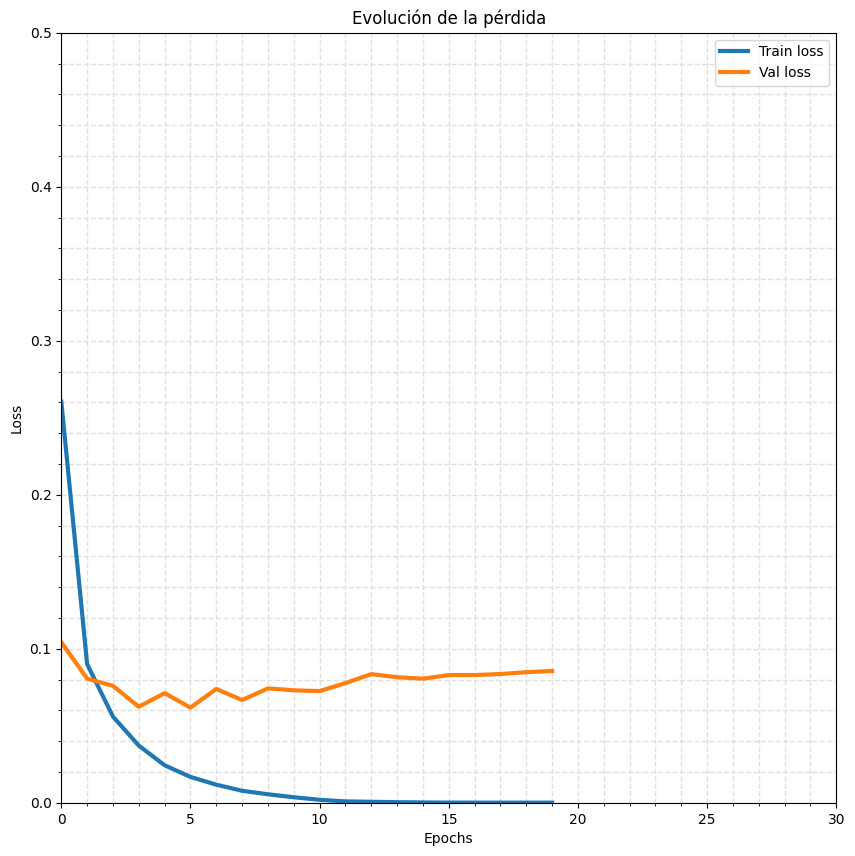

In [35]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], linewidth=3, label='Train loss')
plt.plot(history.history['val_loss'], linewidth=3, label='Val loss')
plt.grid(True, which='both', linestyle='--', linewidth=1, color='#E0E0E0')
plt.minorticks_on()
plt.title('Evolución de la pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 30, 0, 0.5])
plt.legend(loc='upper right')

## Predicciones sobre una imagen individual

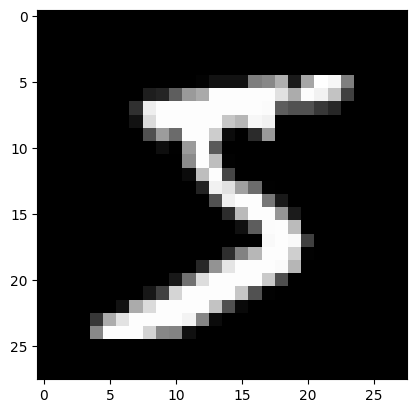

In [47]:
# Imprime la imagen tomada del dataset, con la que se va a predecir la clase
imagen = x_train[0].reshape(28, 28)  # Obtener el gráfico en la posición 0
imagen = imagen / 255  # Normalizar
plt.imshow(imagen, cmap='gray')  # Mostrar en escala de grises
plt.show()

In [38]:
x_single_test = x_train[0] # primera imagen del dataset, visualizada arriba
y_single_test = y_train[0] # primera etiqueta del dataset, visualizada arriba
x_single_test.shape = (1, x_single_test.shape[0])
y_single_test.shape = (1, y_single_test.shape[0])

In [39]:
# Devuelve un array que contiene diez valores, cada uno correspondiente a
# la probabilidad predicha para una de las diez posibles clases (0-9)
model.predict(x_single_test, verbose=1)

1/1 [==============================] - 0s 165ms/step


array([[1.0803469e-22, 2.1132366e-18, 1.3658558e-18, 8.3986750e-05,
        2.6057452e-28, 9.9991596e-01, 9.0596924e-21, 5.9988398e-20,
        3.7563744e-18, 2.7724527e-13]], dtype=float32)

In [40]:
# Devuelve varias métricas de rendimiento del modelo.
model.evaluate(x_single_test, y_single_test,verbose=1)

1/1 [==============================] - 0s 46ms/step - loss: 8.4039e-05 - acc: 1.0000 - mse: 1.4117e-09


[8.40390202938579e-05, 1.0, 1.4116924296203592e-09]